In [2]:
import re
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.errors import SettingWithCopyWarning
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


In [3]:
from sklearn.manifold import TSNE

strategies = ['None', 'Specific', 'Generic']
temperatures = ['0.0', '0.7']
variations = ['0', '1', '2']
recursions = ['0', '1']

regex_patterns = {
    'Powderkg': r'Powderkg = (\d+)',
    'wc': r'wc = ([\d.]+)',
    'materials': r'materials = ([\d./]+)',
    'curing': r'curing = (.+)$'
}


def find_explained_variance_using_pca(correlation_matrix, feature, strategy, temperature):
    pca = PCA(n_components=1)
    data = pd.DataFrame(correlation_matrix)
    pca.fit(data)
    # Get the first principal component
    first_principal_component = pca.components_[0]
    # Print the explained variance ratio, which tells you the proportion of variance
    # explained by the first principal component.
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Explained Variance Ratio for {feature}, {strategy} and {temperature}:", explained_variance_ratio)
    # Print the first principal component, which represents the overall relationship
    print(f"First Principal Component (Overall Relationship) for {feature}, {strategy} and {temperature}:", first_principal_component)


def perform_correlation_analysis(feature, strategy, temperature, variation, recursion):
    correlation_matrix = df.corr()
    correlation_matrix = correlation_matrix.apply(lambda x: round(x, 2))
    average_cc_per_run = correlation_matrix.mean()
    correlation_matrix['Average Correlation'] = average_cc_per_run
    print('AVERAGE CORRELATION COEFFICIENT PER RUN')
    print(average_cc_per_run)
    overall_average_cc = correlation_matrix.stack().mean()
    print('OVERALL CORRELATION COEFFICIENT')
    print(overall_average_cc)
    # NaNs occur when the std is 0, i.e. we have constant functions. We handle this cas by replacing NaN with 1
    correlation_matrix.fillna(1, inplace=True)
    correlation_matrix.to_csv(f'Results/Correlation_Analysis/correlation_matrix_{feature}_{strategy}_{temperature}.csv')
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    # Customize the plot (add labels, title, etc. if needed)
    plt.title(f'Correlation Heatmap {strategy} {temperature}')
    plt.show()
    # plt.savefig(f'Results/Correlation_Analysis/images/correlation_matrix_{feature}_{strategy}_{variation}_{temperature}_{recursion}.png', bbox_inches='tight')
    return correlation_matrix


def plot_individual_experiments(feature, strategy, temperature):
    plt.figure(figsize=(8, 6))
    plt.plot(df.index, df[f'{feature} 1'], label=f'{feature} Experiment 1')
    plt.plot(df.index, df[f'{feature} 2'], label=f'{feature} Experiment 2')
    plt.plot(df.index, df[f'{feature} 3'], label=f'{feature} Experiment 3')
    plt.legend()
    plt.title(f'Lineplot for {strategy} and {temperature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()


def extract_data_for_given_run(pattern):
    matching_filenames = []
    # Iterate through the files in the directory
    dir_name = 'Results/ID'
    for filename in os.listdir(dir_name):
        match = re.match(pattern, filename)
        if match:
            matching_filenames.append(os.path.join(dir_name, filename))
    all_results_df = pd.DataFrame()
    warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
    for i, filename in enumerate(matching_filenames):
        results_sample_df = pd.read_csv(filename)
        results_sample_df.head(2)
        for col, pattern in regex_patterns.items():
            all_results_df[f'{col} {i}'] = results_sample_df['Formulation'].str.extract(pattern, expand=False)
            if col.startswith('materials'):
                all_results_df[f'{col} {i}'] = all_results_df[f'{col} {i}'].str[:3].astype(float)
            if col.startswith('curing'):
                all_results_df[f'{col} {i}'][all_results_df[f'{col} {i}'].astype(str).str.startswith('Heat')] = 0
                all_results_df[f'{col} {i}'][all_results_df[f'{col} {i}'].astype(str).str.startswith('Ambient')] = 1
    return all_results_df, matching_filenames


def tsne_for_feature(feature, strategy, temperature):
    X_2d = tsne.fit_transform(df_transpose)
    # Create a scatter plot of the t-SNE results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c='r', marker='o', label=feature)
    plt.title(f"t-SNE Visualization {strategy} {temperature}")
    plt.legend()
    plt.show()


def tsne_for_all_features(all_features_for_tsne, strategy, temperature):
    scaler = MinMaxScaler()
    scaler.fit(all_features_for_tsne)
    # Transform your DataFrame to apply the scaling
    scaled = pd.DataFrame(scaler.transform(all_features_for_tsne))
    tsne = TSNE(n_components=2, perplexity=2, random_state=0)
    X_2d = tsne.fit_transform(scaled)
    # Create a scatter plot of the t-SNE results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c='r', marker='o', label='All Features')
    plt.title(f"t-SNE Visualization all features {strategy} {temperature}")
    plt.legend()
    plt.show()


def pca_and_corr_on_all_features(df):
    correlation_matrix = df.corr()
    correlation_matrix = correlation_matrix.apply(lambda x: round(x, 8))
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    # Customize the plot (add labels, title, etc. if needed)
    plt.title('Correlation Heatmap between Lineplots')
    plt.show()
    pca = PCA(n_components=1)
    data = pd.DataFrame(correlation_matrix)
    pca.fit(data)
    # Get the first principal component
    first_principal_component = pca.components_[0]
    # Print the explained variance ratio, which tells you the proportion of variance
    # explained by the first principal component.
    explained_variance_ratio = pca.explained_variance_ratio_
    print("Explained Variance Ratio:", explained_variance_ratio)
    # Print the first principal component, which represents the overall relationship
    print("First Principal Component (Overall Relationship):", first_principal_component)

In [4]:
from itertools import product
all_combinations = list(product(strategies, variations, temperatures, recursions))

#### Correlation Analyses between different runs

In [ ]:
for combination in all_combinations[:5]:
    strategy = combination[0]
    variation = combination[1]
    temperature = combination[2]
    recursion = combination[3]
    print('#####################################################################################')
    print(f'################ Run with strategy {strategy}, variation {variation}, temperature {temperature} and recursion {recursion} ####################')
    print('#####################################################################################')
    pattern = fr'gpt-3.5-turbo_{strategy} {variation}_prompt_experiment_(\d+)_temp_{temperature}_target_(\d+)_\%_Dev_Budget_(\d+)_recursive_{recursion}_(\d+)\.csv'
    all_results_df, matching_filenames = extract_data_for_given_run(pattern)

    warnings.filterwarnings("default")

    features = ['Powderkg', 'wc', 'materials']
    for feature in features:
        print(f'################ Feature {feature} ################')
        data = {}
        for i in range(len(matching_filenames)):
            data[f'{feature} {i}'] = list(all_results_df[f'{feature} {i}'].values)

        df = pd.DataFrame(data)
        correlation_matrix = perform_correlation_analysis(feature, strategy, temperature, variation, recursion)
        # plot_individual_experiments(feature, strategy, temperature)
        find_explained_variance_using_pca(correlation_matrix, feature, strategy, temperature)

        tsne = TSNE(n_components=2, perplexity=2, random_state=0)
        df_transpose = df.T
        if feature == 'Powderkg':
            all_features_for_tsne = df_transpose.values
        else:
            all_features_for_tsne = np.hstack((all_features_for_tsne, df_transpose.values))
        # Comment in in case you want to have a tsne visualisation
        # tsne_for_feature(feature, strategy, temperature)

    # Comment in in case you want to have a tsne visualisation
    # tsne_for_all_features(all_features_for_tsne, strategy, temperature)

    df = pd.DataFrame(all_features_for_tsne).T
    df.head(30)

    scaler = MinMaxScaler()
    scaler.fit(df)

    # Transform your DataFrame to apply the scaling
    scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)

    plt.plot(scaled_df.index, scaled_df[1].astype(str))
    plt.plot(scaled_df.index, scaled_df[2].astype(str))
    plt.gca().invert_yaxis()
    plt.show()

    # pca_and_corr_on_all_features(df)

#### Distribution analysis

#####################################################################################
################ Run with strategy None, variation 0, temperature 0.0 and recursion 0 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  360  450  410  430  380  400  390  440  450  420
Powderkg 1  360  450  410  430  380  390  400  420  440  450
Powderkg 2  360  450  410  430  380  400  390  440  450  420
Powderkg 3  360  450  410  430  380  400  390  440  450  420
Powderkg 4  360  450  410  430  380  400  390  440  450  420


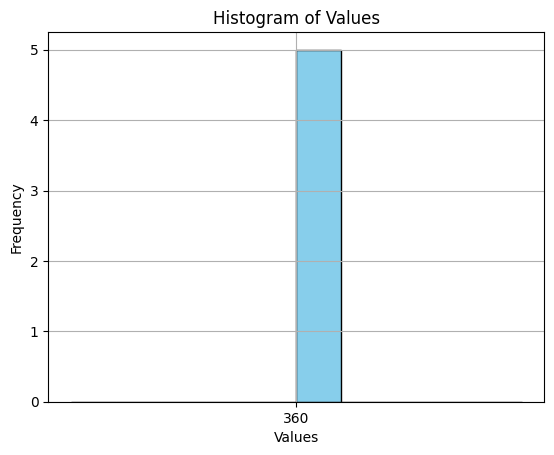

################ Feature wc ################
         0    1     2    3    4     5    6     7     8     9
wc 0  0.45  0.6  0.55  0.5  0.6  0.55  0.5  0.45   0.6   0.5
wc 1  0.45  0.6  0.55  0.5  0.6  0.45  0.5  0.55   0.6  0.45
wc 2  0.45  0.6  0.55  0.5  0.6  0.55  0.5   0.6  0.45   0.5
wc 3  0.45  0.6  0.55  0.5  0.6  0.55  0.5  0.45  0.45   0.5
wc 4  0.45  0.6  0.55  0.5  0.6  0.55  0.5  0.45   0.6  0.55


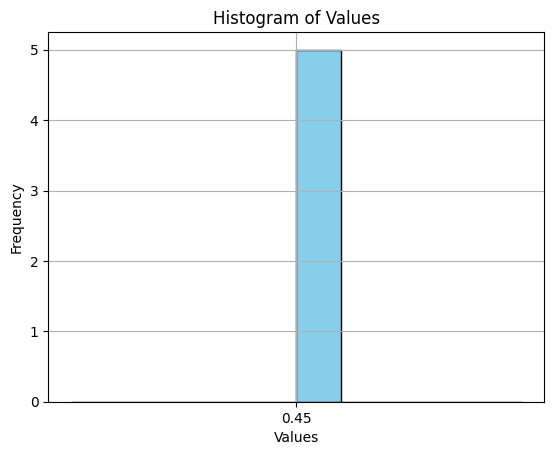

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.7  0.5  0.6  0.7  0.5  0.6  0.7  0.6  0.7  0.6
materials 1  0.7  0.5  0.6  0.7  0.5  0.6  0.7  0.5  0.7  0.6
materials 2  0.7  0.5  0.6  0.7  0.5  0.6  0.7  0.6  0.7  0.5
materials 3  0.7  0.5  0.6  0.7  0.5  0.6  0.7  0.6  0.7  0.6
materials 4  0.7  0.5  0.6  0.7  0.5  0.6  0.7  0.6  0.7  0.5


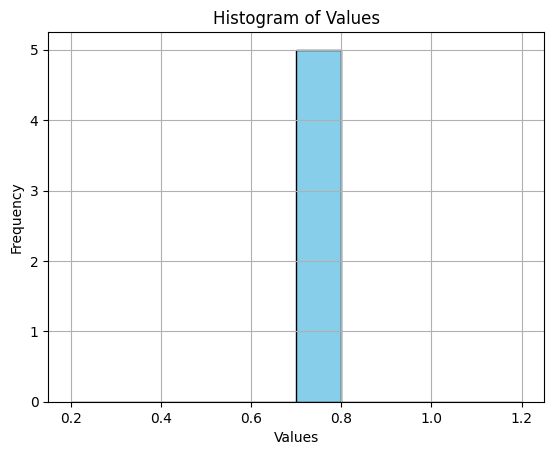

#####################################################################################
################ Run with strategy None, variation 0, temperature 0.0 and recursion 1 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  450  430  400  440  410  450  380  390  450  400
Powderkg 1  450  430  400  440  420  450  390  440  380  410
Powderkg 2  400  440  380  430  450  410  390  410  370  400
Powderkg 3  400  440  380  430  450  410  390  370  410  400
Powderkg 4  400  440  380  430  450  410  390  370  410  400


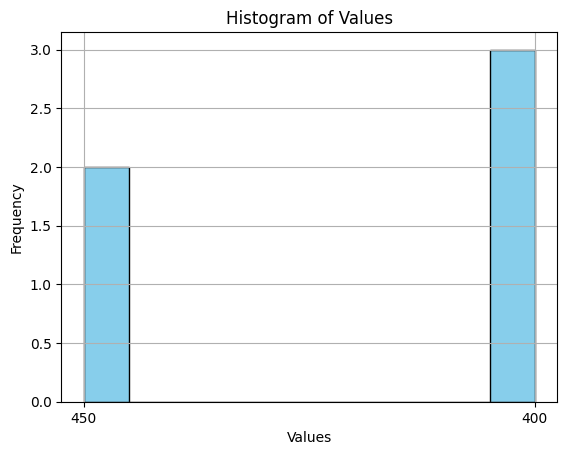

################ Feature wc ################
         0     1     2     3     4     5     6     7    8     9
wc 0   0.5   0.6   0.5  0.55  0.45  0.45   0.6  0.55  0.6  0.45
wc 1   0.5  0.55   0.6   0.5   0.5  0.55   0.5   0.6  0.6  0.45
wc 2  0.45   0.6  0.55  0.55   0.6   0.5  0.45   0.5  0.6   0.5
wc 3  0.45   0.6  0.55  0.55   0.6   0.5  0.45  0.45  0.5   0.5
wc 4  0.45   0.6  0.55  0.55   0.6   0.5  0.45  0.45  0.5   0.5


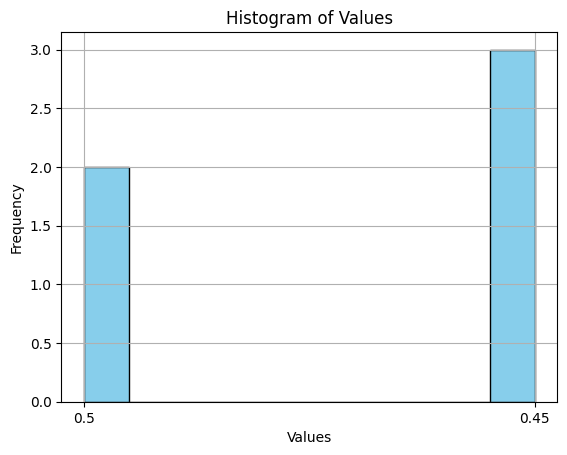

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.6  0.5  0.6  0.6  0.7  0.7  0.5  0.7  0.7  0.5
materials 1  0.6  0.5  0.6  0.6  0.6  0.6  0.7  0.6  0.5  0.7
materials 2  0.7  0.7  0.5  0.7  0.5  0.6  0.6  0.6  0.5  0.6
materials 3  0.7  0.7  0.5  0.7  0.5  0.6  0.6  0.5  0.6  0.6
materials 4  0.7  0.7  0.5  0.7  0.5  0.6  0.6  0.5  0.6  0.6


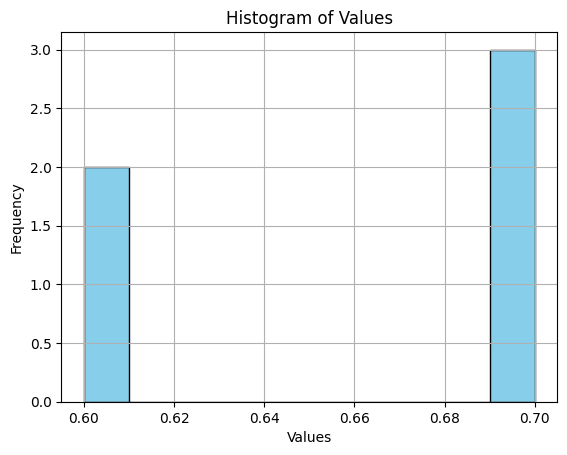

#####################################################################################
################ Run with strategy None, variation 0, temperature 0.7 and recursion 0 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  360  390  400  410  380  450  430  420  440  370
Powderkg 1  360  410  380  450  430  370  440  390  400  450
Powderkg 2  360  380  390  430  450  410  400  420  450  380
Powderkg 3  360  450  410  390  430  420  380  450  400  380
Powderkg 4  360  370  450  440  410  430  400  390  420  450


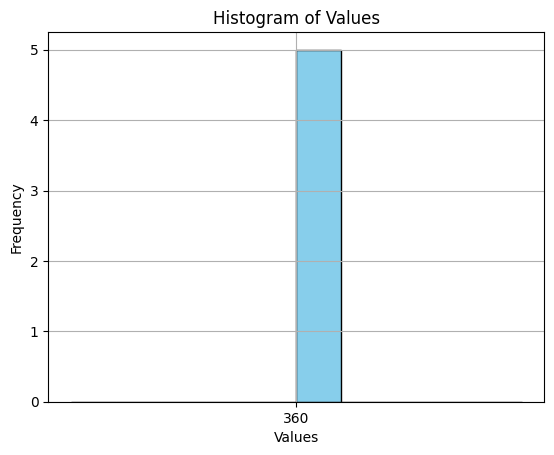

################ Feature wc ################
         0     1     2     3    4     5     6     7    8     9
wc 0  0.45   0.6  0.55   0.5  0.6  0.45  0.55   0.5  0.6  0.45
wc 1  0.45   0.6  0.55   0.6  0.5  0.45  0.55   0.5  0.6  0.45
wc 2  0.45  0.55   0.6  0.45  0.6   0.5  0.45  0.55  0.5   0.6
wc 3  0.45   0.6  0.55   0.5  0.6   0.5  0.55  0.45  0.5   0.6
wc 4  0.45   0.6  0.55   0.5  0.6  0.45  0.55   0.5  0.6  0.45


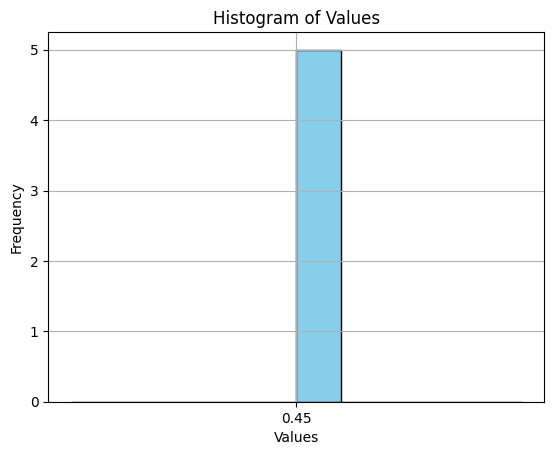

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.7  0.5  0.6  0.7  0.5  0.6  0.7  0.6  0.7  0.7
materials 1  0.7  0.5  0.6  0.7  0.7  0.5  0.6  0.7  0.5  0.7
materials 2  0.7  0.5  0.6  0.7  0.5  0.6  0.5  0.7  0.7  0.7
materials 3  0.7  0.5  0.6  0.7  0.5  0.6  0.7  0.7  0.6  0.5
materials 4  0.7  0.5  0.6  0.7  0.6  0.5  0.6  0.7  0.7  0.5


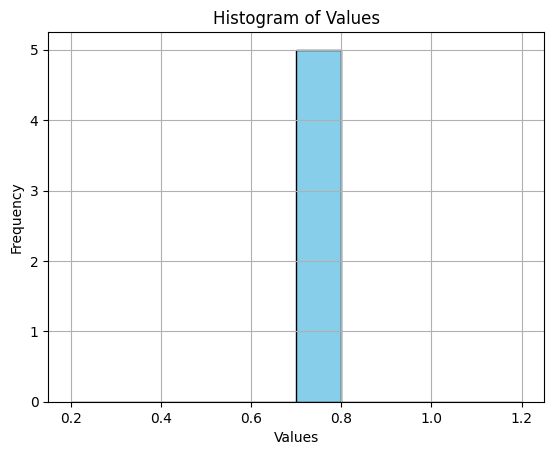

#####################################################################################
################ Run with strategy None, variation 0, temperature 0.7 and recursion 1 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  450  440  380  450  390  410  400  450  380  360
Powderkg 1  410  450  380  390  440  430  450  400  420  450
Powderkg 2  450  420  440  390  430  410  440  400  450  430
Powderkg 3  430  450  400  440  390  450  380  410  430  400
Powderkg 4  440  450  400  420  430  410  430  400  420  380


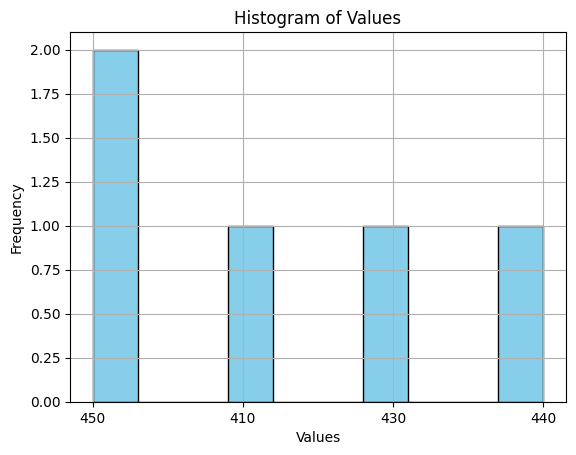

################ Feature wc ################
         0     1     2     3     4     5     6     7     8     9
wc 0  0.45  0.55   0.5   0.5   0.6  0.45  0.45   0.5  0.45  0.45
wc 1  0.45   0.5  0.55   0.5  0.55   0.5   0.5  0.45   0.6  0.45
wc 2   0.5  0.45   0.6   0.6  0.55  0.45   0.5  0.45  0.45  0.45
wc 3   0.5  0.55  0.45  0.55   0.6   0.6  0.55   0.5   0.5  0.55
wc 4   0.6   0.6   0.5   0.6   0.5  0.55  0.45   0.5   0.5   0.6


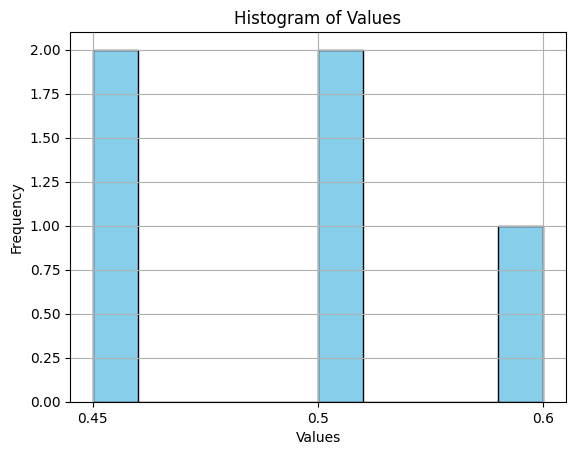

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.7  0.6  0.6  0.6  0.6  0.5  0.5  0.6  0.5  0.5
materials 1  0.7  0.5  0.5  0.7  0.5  0.7  0.5  0.5  0.6  0.5
materials 2  0.6  0.7  0.5  0.7  0.6  0.6  0.5  0.6  0.7  0.5
materials 3  0.6  0.6  0.7  0.7  0.6  0.6  0.6  0.5  0.5  0.5
materials 4  0.7  0.5  0.5  0.5  0.5  0.6  0.7  0.7  0.6  0.5


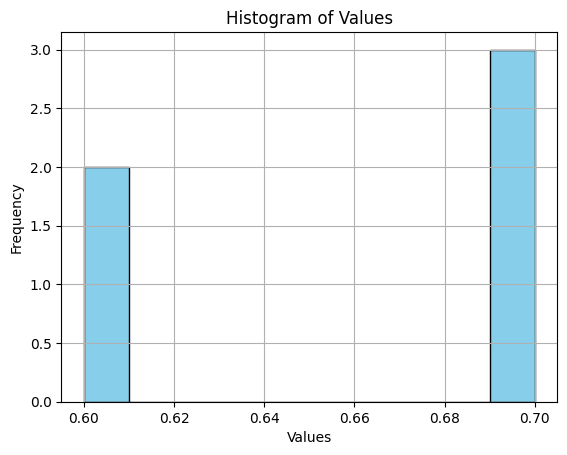

#####################################################################################
################ Run with strategy None, variation 1, temperature 0.0 and recursion 0 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  400  410  450  390  420  430  440  380  450  430
Powderkg 1  400  410  450  390  420  430  440  380  450  430
Powderkg 2  400  410  450  390  420  430  440  380  450  430
Powderkg 3  400  410  450  390  420  430  440  380  450  430
Powderkg 4  400  410  450  390  420  430  440  380  450  430


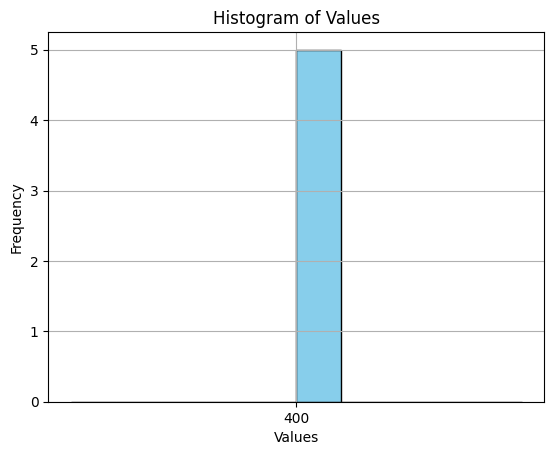

################ Feature wc ################
        0     1    2     3    4    5     6    7    8    9
wc 0  0.5  0.55  0.6  0.45  0.5  0.6  0.55  0.5  0.6  0.6
wc 1  0.5  0.55  0.6  0.45  0.5  0.6  0.55  0.5  0.6  0.6
wc 2  0.5  0.55  0.6  0.45  0.5  0.6  0.55  0.5  0.6  0.6
wc 3  0.5  0.55  0.6  0.45  0.5  0.6  0.55  0.5  0.6  0.6
wc 4  0.5  0.55  0.6  0.45  0.5  0.6  0.55  0.5  0.6  0.6


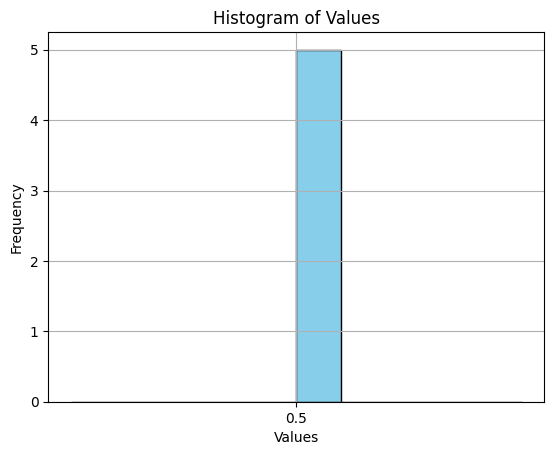

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.6  0.7  0.5  0.7  0.5  0.6  0.7  0.6  0.7  0.5
materials 1  0.6  0.7  0.5  0.7  0.5  0.6  0.7  0.6  0.7  0.5
materials 2  0.6  0.7  0.5  0.7  0.5  0.6  0.7  0.6  0.7  0.5
materials 3  0.6  0.7  0.5  0.7  0.5  0.6  0.7  0.6  0.7  0.5
materials 4  0.6  0.7  0.5  0.7  0.5  0.6  0.7  0.6  0.7  0.5


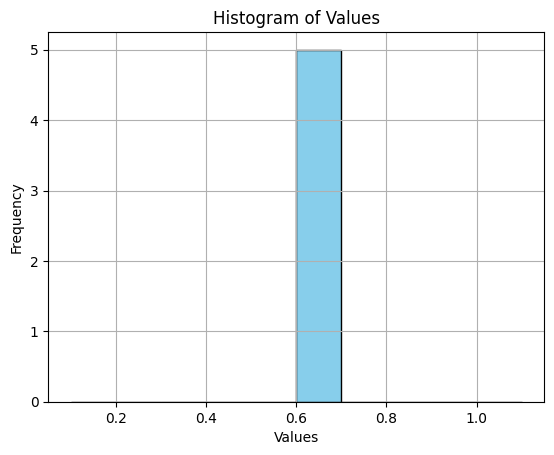

#####################################################################################
################ Run with strategy None, variation 1, temperature 0.0 and recursion 1 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  430  450  400  440  380  420  410  410  450  420
Powderkg 1  430  450  400  440  380  420  410  420  390  420
Powderkg 2  430  450  400  440  410  420  390  410  420  420
Powderkg 3  430  450  400  380  410  400  440  410  450  450


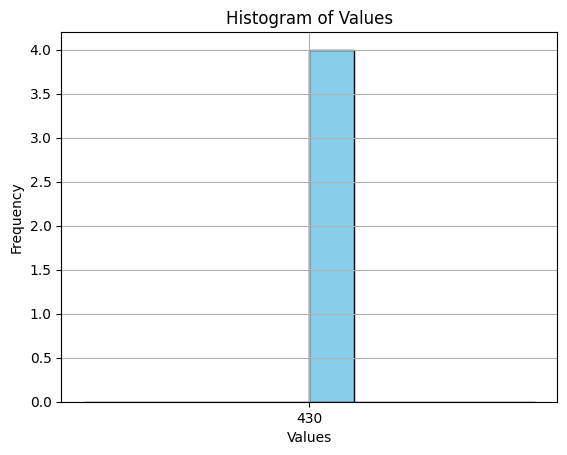

################ Feature wc ################
        0     1    2    3     4    5     6     7     8     9
wc 0  0.5  0.45  0.6  0.5   0.6  0.5  0.55   0.5  0.55   0.5
wc 1  0.5  0.45  0.6  0.5   0.6  0.5  0.45   0.5  0.45   0.5
wc 2  0.5  0.45  0.6  0.5  0.55  0.5  0.55  0.45  0.55  0.55
wc 3  0.5  0.45  0.6  0.6   0.5  0.5  0.55   0.6  0.55   0.6


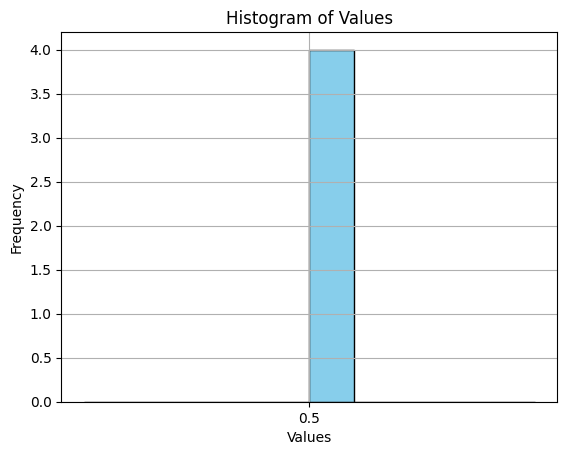

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.6  0.7  0.6  0.7  0.7  0.6  0.5  0.5  0.7  0.5
materials 1  0.6  0.7  0.6  0.7  0.7  0.6  0.6  0.6  0.6  0.6
materials 2  0.6  0.7  0.6  0.7  0.5  0.5  0.6  0.6  0.5  0.5
materials 3  0.6  0.7  0.6  0.7  0.6  0.6  0.5  0.5  0.7  0.7


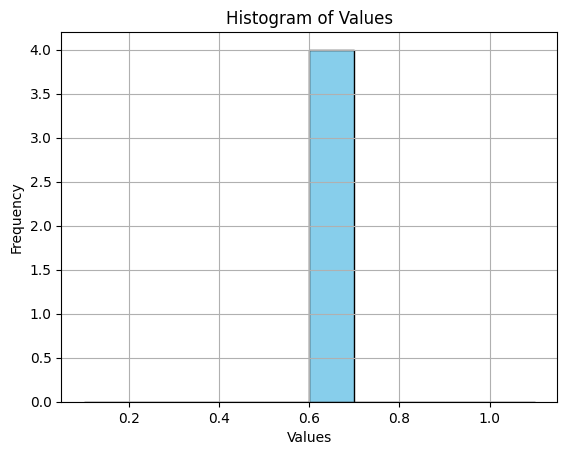

#####################################################################################
################ Run with strategy None, variation 1, temperature 0.7 and recursion 0 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  390  420  430  440  450  400  380  450  410  400
Powderkg 1  370  410  400  450  440  420  390  450  430  450
Powderkg 2  440  450  370  410  380  430  450  400  410  390
Powderkg 3  380  410  440  450  420  450  450  400  390  370
Powderkg 4  360  450  430  420  400  450  390  410  450  410


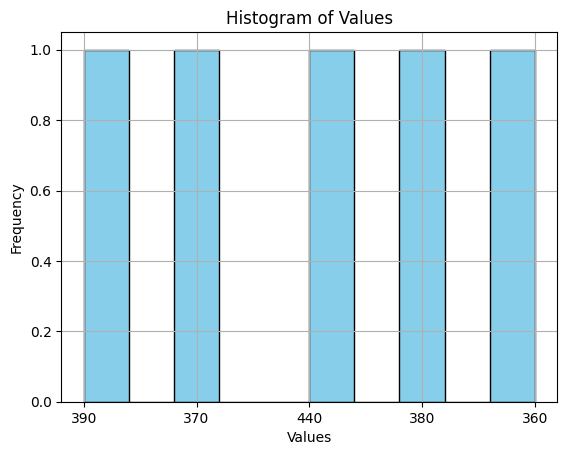

################ Feature wc ################
         0     1     2     3     4     5     6     7     8     9
wc 0   0.5  0.45   0.6  0.55   0.6   0.5  0.55   0.6  0.45   0.6
wc 1   0.5  0.55  0.45   0.6   0.5   0.6   0.6  0.45   0.6  0.55
wc 2  0.55   0.6  0.45   0.5  0.45  0.55   0.6  0.55   0.6   0.5
wc 3   0.5  0.45  0.55   0.6  0.55   0.6   0.6  0.45   0.5  0.45
wc 4  0.45   0.6  0.55   0.5  0.55  0.45   0.6   0.5  0.45  0.55


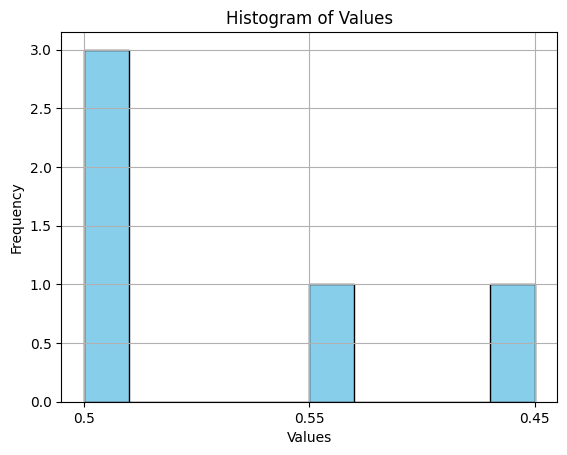

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.7  0.5  0.6  0.7  0.6  0.5  0.7  0.5  0.7  0.5
materials 1  0.5  0.6  0.7  0.7  0.6  0.7  0.5  0.7  0.6  0.7
materials 2  0.5  0.7  0.6  0.7  0.5  0.6  0.5  0.6  0.7  0.5
materials 3  0.6  0.7  0.5  0.7  0.6  0.5  0.6  0.7  0.5  0.7
materials 4  0.7  0.5  0.6  0.7  0.6  0.7  0.5  0.6  0.5  0.7


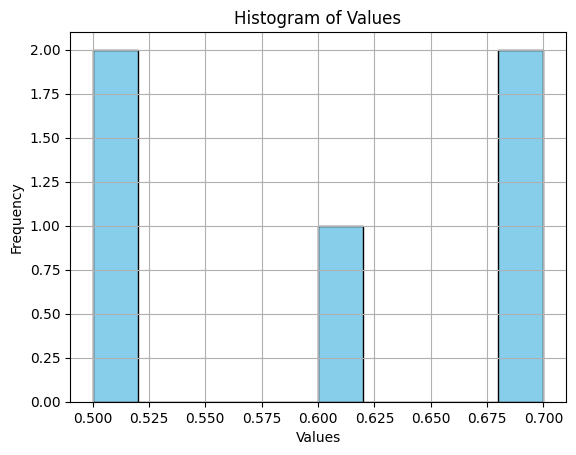

#####################################################################################
################ Run with strategy None, variation 1, temperature 0.7 and recursion 1 ####################
#####################################################################################
################ Feature Powderkg ################
################ Feature wc ################
################ Feature materials ################
#####################################################################################
################ Run with strategy None, variation 2, temperature 0.0 and recursion 0 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  400  410  450  440  450  450  450  450  450  450
Powderkg 1  400  410  450  450  450  450  450  450  450  450
Powderkg 2  400  410  430  450  450  450  450  450  450  450

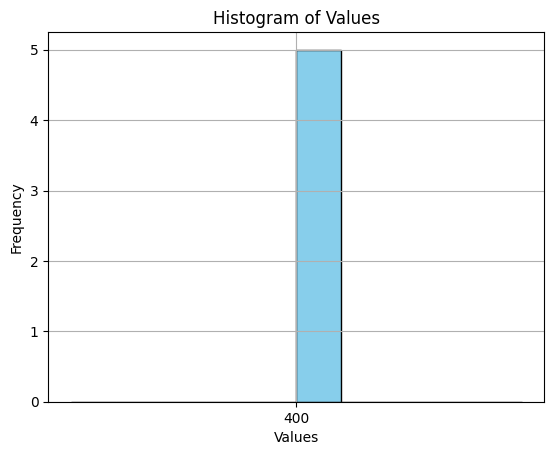

################ Feature wc ################
         0    1     2     3    4    5    6    7    8    9
wc 0  0.45  0.5   0.6  0.55  0.6  0.6  0.6  0.6  0.6  0.6
wc 1  0.45  0.5   0.6   0.6  0.6  0.6  0.6  0.6  0.6  0.6
wc 2  0.45  0.5  0.55   0.6  0.6  0.6  0.6  0.6  0.6  0.6
wc 3  0.45  0.5   0.6  0.55  0.6  0.6  0.6  0.6  0.6  0.6
wc 4  0.45  0.5   0.6  0.55  0.6  0.6  0.6  0.6  0.6  0.6


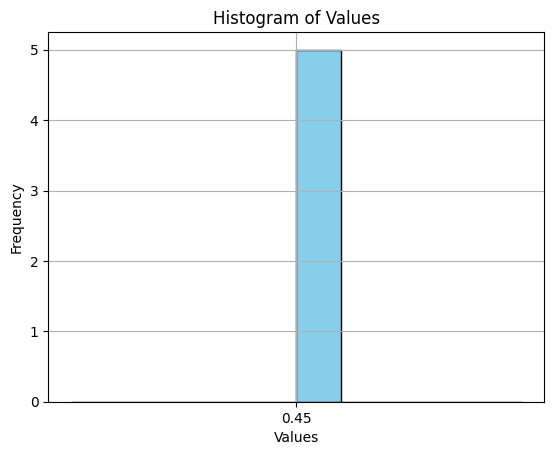

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.7  0.6  0.5  0.7  0.5  0.5  0.5  0.5  0.5  0.5
materials 1  0.7  0.6  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
materials 2  0.7  0.6  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
materials 3  0.7  0.6  0.5  0.7  0.5  0.5  0.5  0.5  0.5  0.5
materials 4  0.7  0.6  0.5  0.7  0.5  0.5  0.5  0.5  0.5  0.5


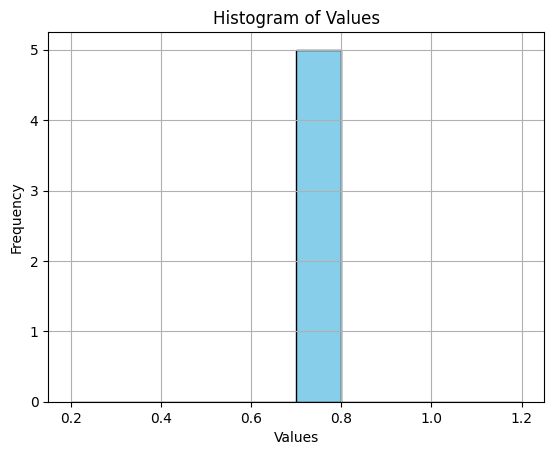

#####################################################################################
################ Run with strategy None, variation 2, temperature 0.0 and recursion 1 ####################
#####################################################################################
################ Feature Powderkg ################
              0    1    2    3    4    5    6    7    8    9
Powderkg 0  450  400  440  410  420  380  370  450  400  390
Powderkg 1  450  400  440  410  420  380  370  450  400  390
Powderkg 2  450  400  410  420  430  440  380  410  390  410
Powderkg 3  450  400  430  440  410  380  450  400  390  450
Powderkg 4  450  440  410  420  380  400  380  370  400  430


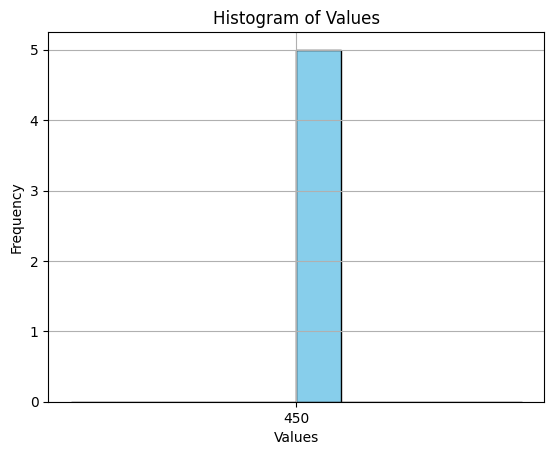

################ Feature wc ################
        0     1     2     3     4     5     6     7     8     9
wc 0  0.6  0.45   0.6   0.5  0.55  0.45  0.45  0.55  0.55  0.45
wc 1  0.6  0.45   0.6   0.5  0.55  0.45  0.45  0.55  0.55  0.45
wc 2  0.6  0.45  0.45  0.55   0.5   0.5  0.45   0.5  0.45  0.55
wc 3  0.6  0.45   0.5   0.6  0.55  0.45  0.45  0.55  0.45  0.55
wc 4  0.6  0.55   0.5   0.5   0.5  0.45   0.6   0.6   0.5  0.55


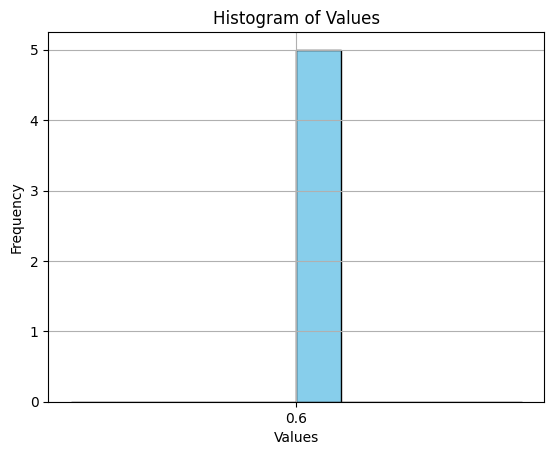

################ Feature materials ################
               0    1    2    3    4    5    6    7    8    9
materials 0  0.5  0.5  0.5  0.7  0.6  0.6  0.5  0.7  0.6  0.6
materials 1  0.5  0.5  0.5  0.7  0.6  0.6  0.5  0.7  0.6  0.6
materials 2  0.5  0.5  0.5  0.5  0.7  0.6  0.6  0.6  0.6  0.6
materials 3  0.5  0.5  0.7  0.5  0.6  0.6  0.6  0.5  0.6  0.6
materials 4  0.5  0.6  0.7  0.6  0.6  0.7  0.5  0.5  0.5  0.6


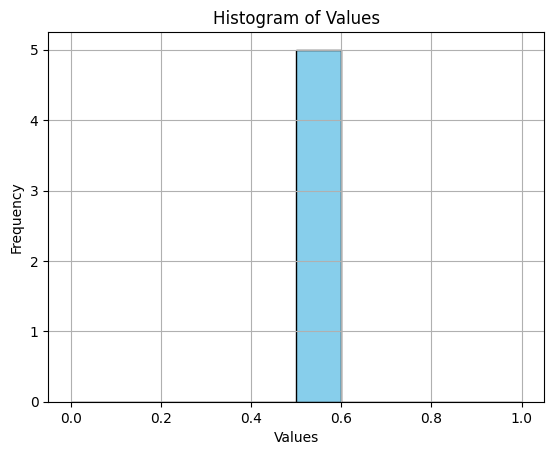

In [21]:
# TODO: Refactor and detailed analysis for all 'rounds' (currently we only inspect the first round for all the experiments)

for combination in all_combinations[:10]:
    strategy = combination[0]
    variation = combination[1]
    temperature = combination[2]
    recursion = combination[3]

    pattern = fr'gpt-3.5-turbo_{strategy} {variation}_prompt_experiment_(\d+)_temp_{temperature}_target_(\d+)_\%_Dev_Budget_(\d+)_recursive_{recursion}_(\d+)\.csv'
    all_results_df, matching_filenames = extract_data_for_given_run(pattern)

    warnings.filterwarnings("default")

    print('#####################################################################################')
    print(f'################ Run with strategy {strategy}, variation {variation}, temperature {temperature} and recursion {recursion} ####################')
    print('#####################################################################################')

    features = ['Powderkg', 'wc', 'materials']
    for feature in features:
        print(f'################ Feature {feature} ################')
        data = {}
        powders = {}
        wc_ratios = {}
        materials = {}
        for i in range(len(matching_filenames)):
            data[f'{feature} {i}'] = list(all_results_df[f'{feature} {i}'].values)
            if feature == 'Powderkg':
                powders[f'{feature} {i}'] = list(all_results_df[f'{feature} {i}'].values)
            elif feature == 'wc':
                wc_ratios[f'{feature} {i}'] = list(all_results_df[f'{feature} {i}'].values)
            elif feature == 'materials':
                materials[f'{feature} {i}'] = list(all_results_df[f'{feature} {i}'].values)


        df = pd.DataFrame(data)
        df_powders = pd.DataFrame(powders)
        df_wc = pd.DataFrame(wc_ratios)
        df_materials = pd.DataFrame(materials)
        if len(df_powders) > 0:
            df = df_powders.T
            print(df)
            plt.hist(df[0], bins=10, color='skyblue', edgecolor='black')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
            plt.title('Histogram of Values')
            plt.grid(True)
            plt.show()
        if len(df_wc) > 0:
            df = df_wc.T
            print(df)
            plt.hist(df[0], bins=10, color='skyblue', edgecolor='black')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
            plt.title('Histogram of Values')
            plt.grid(True)
            plt.show()
        if len(df_materials) > 0:
            df = df_materials.T
            print(df)
            plt.hist(df[0], bins=10, color='skyblue', edgecolor='black')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
            plt.title('Histogram of Values')
            plt.grid(True)
            plt.show()
